# Tanmay Garg
## CS20BTECH11063
### Data Science Analysis Assignment 6

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import astroML
from astroML.stats import sigmaG
import pandas as pd
import seaborn as sns
np.random.seed(0)

# Q1

In [29]:
einstein_theory_value = 1.74
newtonian_theory_value = einstein_theory_value / 2
eddington_val = 1.61
eddington_error = 0.4
crommelin_val = 1.98
crommelin_error = 0.16

# Likelihoods for Eddington and Crommelin wrt Einstein and Newtonian
llh_eddington_einstein = stats.norm.pdf(eddington_val, loc=einstein_theory_value, scale=eddington_error)
print("Likelihood of Eddington data given Einstein theory: ", llh_eddington_einstein)
llh_eddington_newtonian = stats.norm.pdf(eddington_val, loc=newtonian_theory_value, scale=eddington_error)
print("Likelihood of Eddington data given Newtonian theory: ", llh_eddington_newtonian)
llh_crommelin_einstein = stats.norm.pdf(crommelin_val, loc=einstein_theory_value, scale=crommelin_error)
print("Likelihood of Crommelin data given Einstein theory: ", llh_crommelin_einstein)
llh_crommelin_newtonian = stats.norm.pdf(crommelin_val, loc=newtonian_theory_value, scale=crommelin_error)
print("Likelihood of Crommelin data given Newtonian theory: ", llh_crommelin_newtonian, "\n")

bayes_factor_eddington = llh_eddington_einstein / llh_eddington_newtonian
print("Bayes Factor for Eddington data: ", bayes_factor_eddington)
bayes_factor_crommelin = llh_crommelin_einstein / llh_crommelin_newtonian
print("Bayes Factor for Crommelin data: ", bayes_factor_crommelin, "\n")

# unnormalized posterior probabilities
unnorm_einstein = llh_eddington_einstein * llh_crommelin_einstein
print("Unnormalized posterior probability for Einstein: ", unnorm_einstein)
unnorm_newtonian = llh_eddington_newtonian * llh_crommelin_newtonian
print("Unnormalized posterior probability for Newtonian: ", unnorm_newtonian, "\n")

# normalized posterior probabilities
norm_einstein = unnorm_einstein / (unnorm_einstein + unnorm_newtonian)
print("Normalized posterior probability for Einstein: ", norm_einstein)
norm_newtonian = unnorm_newtonian / (unnorm_einstein + unnorm_newtonian)
print("Normalized posterior probability for Newtonian: ", norm_newtonian, "\n")

# Bayes Factor Calculation
print("Bayes Factor for Einstein vs Newtonian: ", norm_einstein / norm_newtonian)
print("Bayes Factor for Newtonian vs Einstein: ", norm_newtonian / norm_einstein)

Likelihood of Eddington data given Einstein theory:  0.9460495798345487
Likelihood of Eddington data given Newtonian theory:  0.180162185840545
Likelihood of Crommelin data given Einstein theory:  0.8094849729118234
Likelihood of Crommelin data given Newtonian theory:  8.825328522553487e-11 

Bayes Factor for Eddington data:  5.25109958796716
Bayes Factor for Crommelin data:  9172292802.960836 

Unnormalized posterior probability for Einstein:  0.7658129185056116
Unnormalized posterior probability for Newtonian:  1.589990477384144e-11 

Normalized posterior probability for Einstein:  0.9999999999792378
Normalized posterior probability for Newtonian:  2.0762126609901023e-11 

Bayes Factor for Einstein vs Newtonian:  48164622958.34179
Bayes Factor for Newtonian vs Einstein:  2.076212661033209e-11


For individual Bayes Factor from Eddington and Crommelin, we can see that Eddington's measurement has substantial evidence for Einsteinian Model and Crommelin's measurement has decisive strength to Einsteinian Model.

Bayes Factor for *Einstein vs Newtonian* and *Newtonian vs Einstein* shows that Einsteinian model is more likely supported than Newtonian model.

# Q2

     x    y  sigma_y
4  203  495       21
5   58  173       15
6  210  479       27
7  202  504       14
8  198  510       30
m = 2.240
b = 34.048


  0%|          | 0/5000 [00:00<?, ?it/s]/home/kali1tanmay/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [00:23<00:00, 212.68it/s]


(400000, 3)
m = 2.174 + 0.199 - -69.589 (68% CI) + 0.407 - -108.823 (95% CI)
b = 36.013 + -34.046 - 34.249 (68% CI) + -34.273 - 70.091 (95% CI)


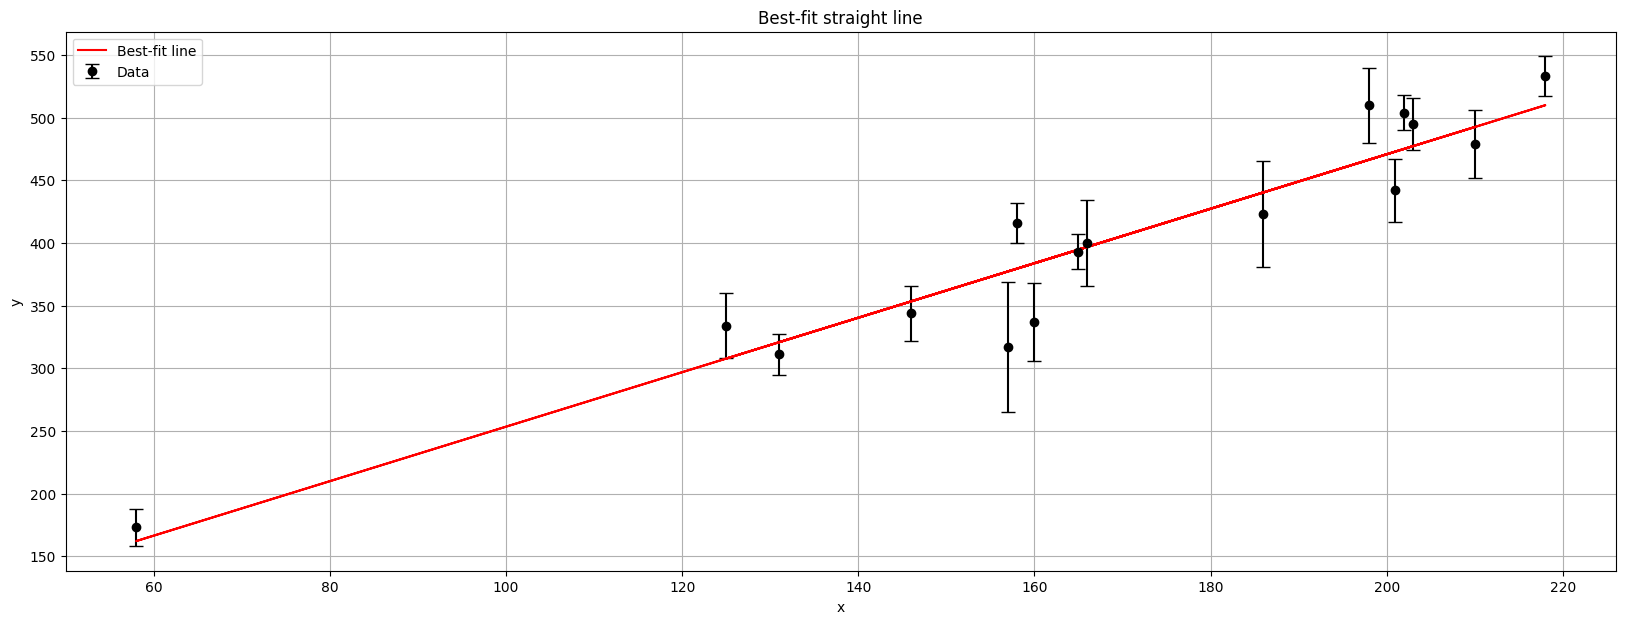

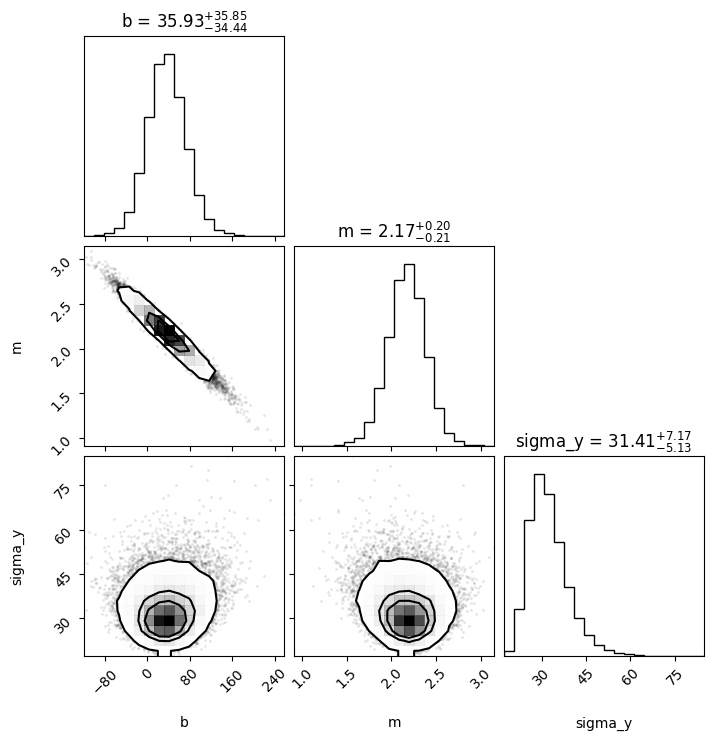

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emcee
from IPython.display import display, Math

# Read the data from the csv file
df = pd.read_csv('q2.csv', sep=' ')
df.drop('ID', axis=1, inplace=True)
df.drop('sigma_x', axis=1, inplace=True)
# df.drop('sigma_y', axis=1, inplace=True)
df.drop('rho', axis=1, inplace=True)
# remove first 4 rows
df = df.iloc[4:]
print(df.head())

# Fit the data using method in paper
Y = df['y'].to_numpy()
X = df['x'].to_numpy()
X = np.concatenate((np.ones((len(X), 1)), X.reshape(-1, 1)), axis=1)
C = np.diag(df['sigma_y'].to_numpy() ** 2)
best_fit_val = np.linalg.inv(X.T @ np.linalg.inv(C) @ X) @ (X.T @ np.linalg.inv(C) @ Y)
m_fit = best_fit_val[1]
b_fit = best_fit_val[0]
print(f'm = {m_fit:.3f}')
print(f'b = {b_fit:.3f}')

# Extract the columns as numpy arrays
x = df['x'].values
y = df['y'].values
sigma_y = df['sigma_y'].values

# Define the log likelihood function
def ln_likelihood(theta, x, y): #, sigma_y):
    b, m, sigma_y = theta
    y_pred = m * x + b
    likelihood = -0.5 * np.sum(np.log(2 * np.pi * sigma_y ** 2) + (y - y_pred) ** 2 / sigma_y ** 2)
    return likelihood

# Define the log prior function
def ln_prior(theta):
    b, m, err = theta
    # if -30 < m < 30 and -100 < b < 100:
    #     return 0.0
    # return -np.inf
    if err < 0:
        return -np.inf
    else:
        return -1.5 * np.log(1 + m ** 2) - np.log(err)

# Define the log probability function
def ln_prob(theta, x, y):
    lp = ln_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + ln_likelihood(theta, x, y)

# Set up the initial positions and number of walkers
ndim = 3
nwalkers = 100
# set pos to be a small random perturbation of the best-fit values
pos = np.random.randn(nwalkers, ndim) #np.array([m_fit, b_fit, ]) + 1e-4 * np.random.randn(nwalkers, ndim)
# pos = pos + 1e-4 * np.random.randn(nwalkers, ndim)

# Set up the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_prob, args=(x, y))

# Run the sampler and discard the burn-in samples
nburn = 1000
nsteps = 5000
sampler.run_mcmc(pos, nsteps, progress=True)
samples = sampler.chain[:, nburn:, :].reshape(-1, ndim)
print(samples.shape)

# # Calculate the confidence intervals
b_median, m_median, sigma_y_median = np.median(samples, axis=0)
# print(b_median, m_median, sigma_y_median)
b_sigma68, m_sigma68 = np.percentile(samples, [16, 84], axis=0)
b_sigma95, m_sigma95 = np.percentile(samples, [2.5, 97.5], axis=0)

# Print the results
print(f'm = {m_median:.3f} + {m_sigma68[1] - m_median:.3f} - {m_median - m_sigma68[0]:.3f} (68% CI) + {m_sigma95[1] - m_median:.3f} - {m_median - m_sigma95[0]:.3f} (95% CI)')
print(f'b = {b_median:.3f} + {b_sigma68[1] - b_median:.3f} - {b_median - b_sigma68[0]:.3f} (68% CI) + {b_sigma95[1] - b_median:.3f} - {b_median - b_sigma95[0]:.3f} (95% CI)')

# m_sigma68, b_sigma68 = np.percentile(samples, [16, 84], axis=0)
# m_sigma95, b_sigma95 = np.percentile(samples, [2.5, 97.5], axis=0)

# # # Print the results
# # print(f'm = {m_median:.3f} + {m_sigma68[1] - m_median:.3f} - {m_median - m_sigma68[0]:.3f} (68% CI) + {m_sigma95[1] - m_median:.3f} - {m_median - m_sigma95[0]:.3f} (95% CI)')
# # print(f'b = {b_median:.3f} + {b_sigma68[1] - b_median:.3f} - {b_median - b_sigma68[0]:.3f} (68% CI) + {b_sigma95[1] - b_median:.3f} - {b_median - b_sigma95[0]:.3f} (95% CI)')

# # print the results in latex for 68% and 95% confidence intervals separately
# print('68% confidence intervals')
# display(Math(r'm = %.3f^{+%.3f}_{-%.3f}' % (m_median, m_sigma68[1] - m_median, m_median - m_sigma68[0])))
# display(Math(r'b = %.3f^{+%.3f}_{-%.3f}' % (b_median, b_sigma68[1] - b_median, b_median - b_sigma68[0])))
# print('95% confidence intervals')
# display(Math(r'm = %.3f^{+%.3f}_{-%.3f}' % (m_median, m_sigma95[1] - m_median, m_median - m_sigma95[0])))
# display(Math(r'b = %.3f^{+%.3f}_{-%.3f}' % (b_median, b_sigma95[1] - b_median, b_median - b_sigma95[0])))


# Plot the data and the best-fit line
fig, ax = plt.subplots(figsize=(20, 7))
ax.grid()
ax.errorbar(x, y, yerr=sigma_y, fmt='ok', ecolor='black', lw=1.5, capsize=5, label='Data')
ax.plot(x, m_median*x + b_median, ls='-', label='Best-fit line', color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('Best-fit straight line')
plt.show()

# # Plot MCMC chains
# fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
# labels = ['m', 'b']
# for i in range(ndim):
#     axes[i].plot(sampler.chain[:, :, i].T, 'k', alpha=0.3)
#     axes[i].set_xlim(0, len(sampler.chain[0]))
#     axes[i].set_ylabel(labels[i])
#     axes[i].yaxis.set_label_coords(-0.1, 0.5)
# axes[-1].set_xlabel('Step number')
# plt.show()

# use the corner package to plot the 2D posterior distributions
import corner
flat_samples = sampler.get_chain(discard=nburn, thin=15, flat=True)
fig = corner.corner(data=flat_samples, labels=['b', 'm', 'sigma_y'],
                    levels=[0.68, 0.5, 0.95], show_titles=True, 
                    title_kwargs={"fontsize": 12})
plt.show()

# plt.figure(figsize=(15, 5))
# plt.scatter(flat_samples[:, 0], flat_samples[:, 1], s=1)
# plt.xlabel('m')
# plt.ylabel('b')
# plt.xlim(1.5,3)
# plt.ylim(-50,100)
# plt.show()


Reference: http://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/

# Q3

     x    y  sigma_y
0  201  592       61
1  244  401       25
2   47  583       38
3  287  402       15
4  203  495       21
MSE fit: m = 1.077, b = 213.274
Huber fit: m = 2.013, b = 59.596


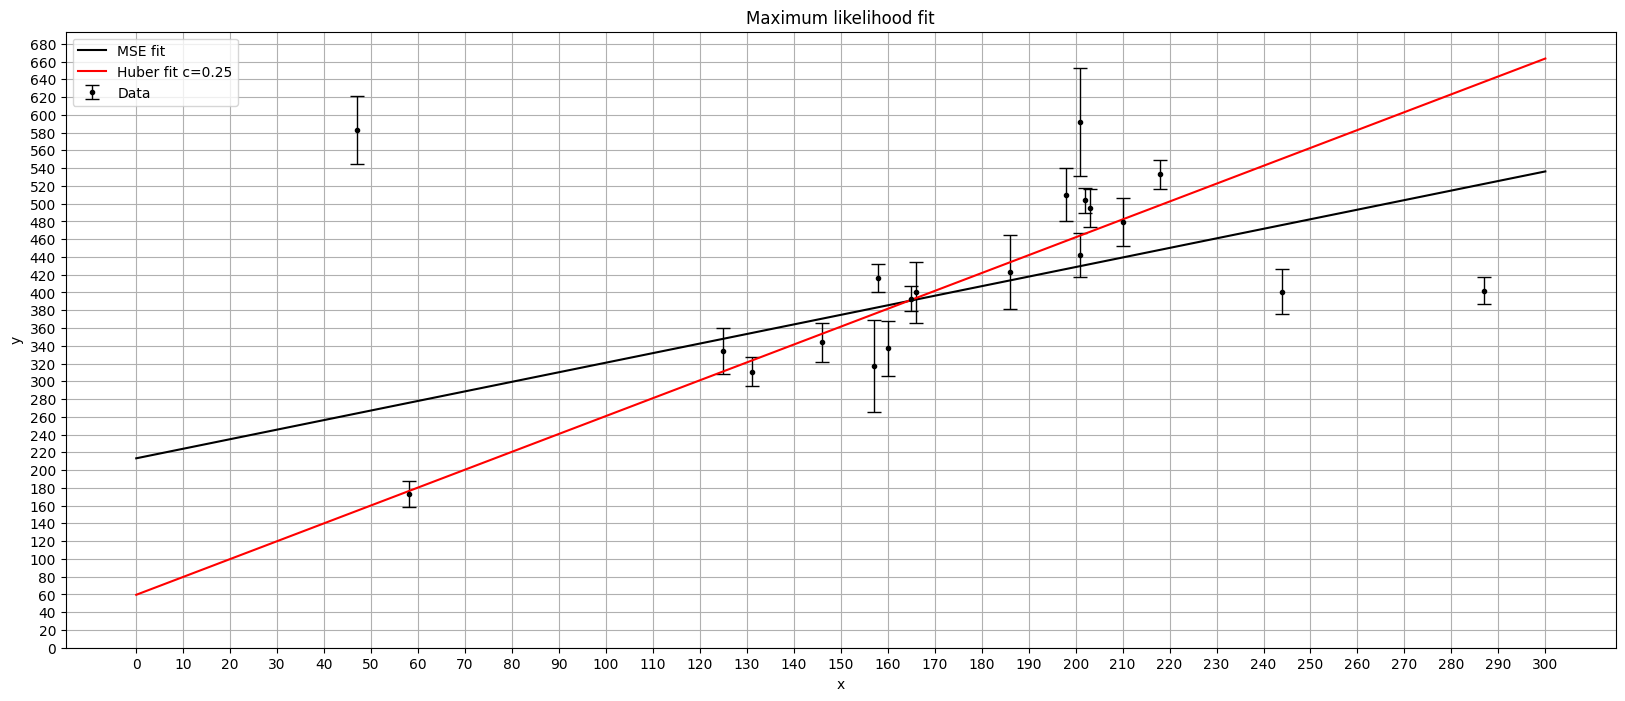

100%|██████████| 15000/15000 [00:50<00:00, 294.33it/s]


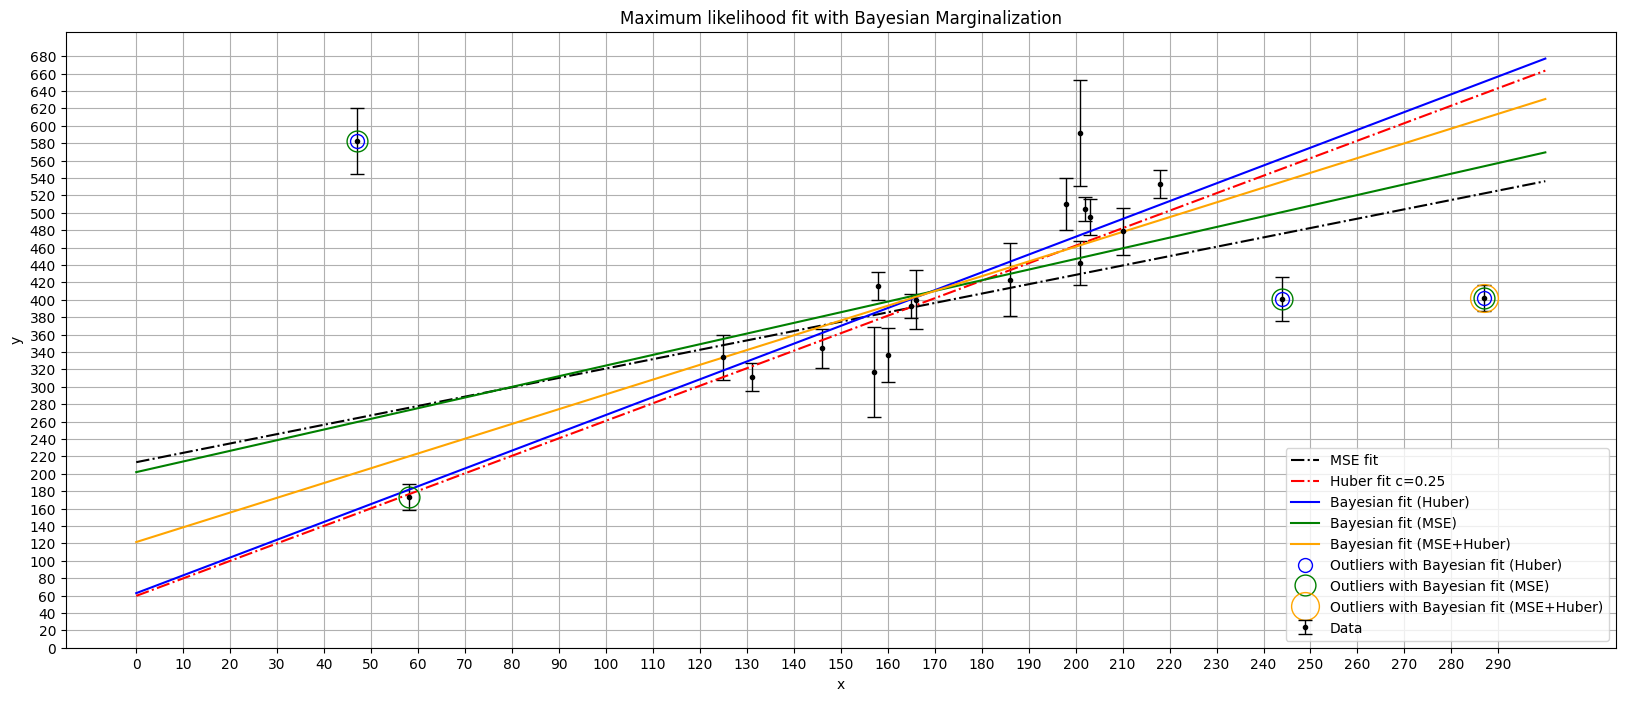

In [5]:
from scipy import optimize

# Read the data from the csv file
df = pd.read_csv('q2.csv', sep=' ')
df.drop('ID', axis=1, inplace=True)
df.drop('sigma_x', axis=1, inplace=True)
# df.drop('sigma_y', axis=1, inplace=True)
df.drop('rho', axis=1, inplace=True)
print(df.head())
x = df['x'].values
y = df['y'].values
sigma_y = df['sigma_y'].values

c_huber = 0.25

def mse_loss(theta, x=x, y=y, sigma_y=sigma_y):
    dy = y - (theta[0] + theta[1] * x)
    return np.sum(0.5 * (dy / sigma_y) ** 2)

def huber_loss(t, c=2):
    return ((abs(t) < c) * 0.5 * t ** 2 + (abs(t) >= c) * -c * (0.5 * c - abs(t)))

def total_huber_loss(theta, x=x, y=y, sigma_y=sigma_y, c=c_huber):
    return huber_loss((y - theta[0] - theta[1] * x) / sigma_y, c).sum()

# total_huber_loss_lambda = lambda c: lambda theta: total_huber_loss(theta, c=c)

# Find the best-fit parameters using the least-squares method
theta1 = optimize.fmin(mse_loss, [0, 0], disp=False)

# Find the best-fit parameters using the Huber loss function
theta2 = optimize.fmin(total_huber_loss, [0, 0], disp=False)
# print(theta2)

# theta_tmp = optimize.fmin(total_huber_loss_lambda(c_huber), [0, 0], disp=False)

# Print the results of the fits
print(f'MSE fit: m = {theta1[1]:.3f}, b = {theta1[0]:.3f}')
print(f'Huber fit: m = {theta2[1]:.3f}, b = {theta2[0]:.3f}')

xfit = np.linspace(0, np.round(x.max(), -2), 1000)
plt.figure(figsize=(20, 8))
plt.errorbar(x, y, yerr=sigma_y, fmt='.k', capsize=5, lw=1, label='Data')
plt.plot(xfit, theta1[1] * xfit + theta1[0], '-k', label='MSE fit')
plt.plot(xfit, theta2[1] * xfit + theta2[0], '-r', label='Huber fit c={}'.format(c_huber))
plt.title('Maximum likelihood fit')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(0, 310, 10))
plt.yticks(np.arange(0, 700, 20))
plt.legend()
plt.grid()
plt.show()

# Bayesian Marginalization
def log_prior(theta):
    # m, b = theta
    # to individally check for all thetas in the array
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0.0
    else:
        return -np.inf
    
def log_likelihood(theta, x, y, sigma_y, sigmaB):
    dy = y - (theta[0] + theta[1] * x)
    clipped_dat = np.clip(theta[2:], 0, 1)
    log_l1 = np.log(clipped_dat) - 0.5 * np.log(2 * np.pi * sigma_y ** 2) - 0.5 * (dy / sigma_y) ** 2
    log_l2 = np.log(1 - clipped_dat) - 0.5 * np.log(2 * np.pi * sigmaB ** 2) - 0.5 * (dy / sigmaB) ** 2
    return np.sum(np.logaddexp(log_l1, log_l2))

def log_probability(theta, x, y, sigma_y, sigmaB):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, sigma_y, sigmaB)

ndim = 2 + len(x) 
nwalkers = 50 
nburn = 1000
nsteps = 15000 

pos = np.zeros((nwalkers, ndim))
pos[:, :2] = np.random.normal(theta2, 3, (nwalkers, 2))
pos[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))
# print(pos)

sampler1 = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=[x, y, sigma_y, 100])
sampler1.run_mcmc(pos, nsteps, progress=True)
samples = sampler1.get_chain(discard=nburn, thin=15, flat=True)

pos2 = np.zeros((nwalkers, ndim))
pos2[:, :2] = np.random.normal(theta1, 3, (nwalkers, 2))
pos2[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))
sampler2 = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=[x, y, sigma_y, 100])
sampler2.run_mcmc(pos2, nsteps, progress=True)
samples2 = sampler2.get_chain(discard=nburn, thin=15, flat=True)

pos3 = np.zeros((nwalkers, ndim))
pos3[:, :2] = np.random.normal((theta1+theta2)/2, 3, (nwalkers, 2))
pos3[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))
sampler3 = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=[x, y, sigma_y, 100])
sampler3.run_mcmc(pos3, nsteps, progress=True)
samples3 = sampler3.get_chain(discard=nburn, thin=15, flat=True)

# sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
# samples = sampler.chain[:, nburn:, :].reshape(-1, ndim)
# plt.plot(samples[:, 0], samples[:, 1], 'k.', alpha=0.1)
# plt.xlabel('m')
# plt.ylabel('b')
# plt.show()
# plt.figure(figsize=(15, 5))
# plt.plot(samples[:, 0], samples[:, 1], 'k.', alpha=0.1)
# plt.xlabel('m')
# plt.ylabel('b')
# plt.show()

theta3 = np.mean(samples[:, :2], axis=0)
# print(theta3)
tmp1 = np.mean(samples[:, 2:], axis=0)
outliers1 = (tmp1 < 0.42)

theta4 = np.mean(samples2[:, :2], axis=0)
tmp2 = np.mean(samples2[:, 2:], axis=0)
outliers2 = (tmp2 < 0.42)

theta5 = np.mean(samples3[:, :2], axis=0)
tmp3 = np.mean(samples3[:, 2:], axis=0)
outliers3 = (tmp3 < 0.42)


plt.figure(figsize=(20, 8))
plt.errorbar(x, y, yerr=sigma_y, fmt='.k', capsize=5, lw=1, label='Data')
plt.plot(xfit, theta1[1] * xfit + theta1[0], '-.k', label='MSE fit')
plt.plot(xfit, theta2[1] * xfit + theta2[0], '-.r', label='Huber fit c={}'.format(c_huber))
plt.plot(xfit, theta3[1] * xfit + theta3[0], '-b', label='Bayesian fit (Huber)')
plt.plot(xfit, theta4[1] * xfit + theta4[0], '-g', label='Bayesian fit (MSE)')
plt.plot(xfit, theta5[1] * xfit + theta5[0], '-', label='Bayesian fit (MSE+Huber)', color='orange')
plt.plot(x[outliers1], y[outliers1], 'ro', ms=10, mfc='none', mec='blue', label='Outliers with Bayesian fit (Huber)')
plt.plot(x[outliers2], y[outliers2], 'ro', ms=15, mfc='none', mec='green', label='Outliers with Bayesian fit (MSE)')
plt.plot(x[outliers3], y[outliers3], 'ro', ms=20, mfc='none', mec='orange', label='Outliers with Bayesian fit (MSE+Huber)')
plt.title('Maximum likelihood fit with Bayesian Marginalization')
plt.xlabel('x')
plt.ylabel('y')
plt.yticks(np.arange(0, 700, 20))
plt.xticks(np.arange(0, 300, 10))
# plt.yticks(np.arange(100, 630, 10))
plt.legend(loc='best')
plt.grid()
plt.show()

As we can see from the above plots, the outliers detected by our three initializations of Bayesian Marginalization, i.e., Bayesian Fit with Huber fit solution, Bayesian Fit with MSE fit and the average of these two, are **almost same**. 

The common points detected as outliers are the points with the following coordinates:
- (244, 401)
- (287, 402)
- (47, 583)

     x    y  sigma_y
0  201  592       61
1  244  401       25
2   47  583       38
3  287  402       15
4  203  495       21
MSE fit: m = 1.077, b = 213.274
Huber fit: m = 2.013, b = 59.596, c = 0.250
Huber fit: m = 1.992, b = 63.450, c = 1.000
Huber fit: m = 1.965, b = 70.006, c = 3.000
Huber fit: m = 1.891, b = 86.206, c = 5.000
Huber fit: m = 1.579, b = 134.310, c = 7.000


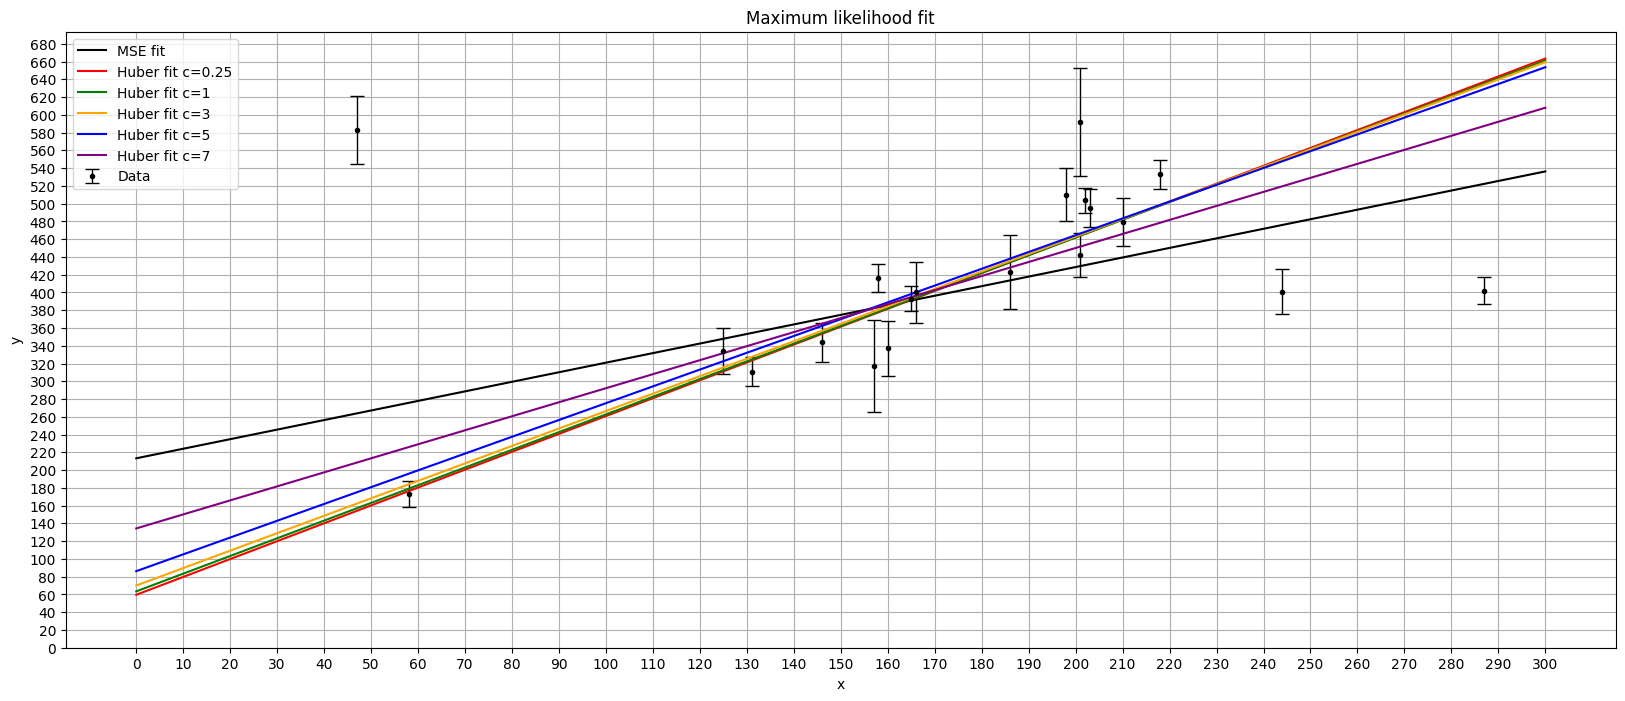

100%|██████████| 15000/15000 [00:55<00:00, 269.79it/s]


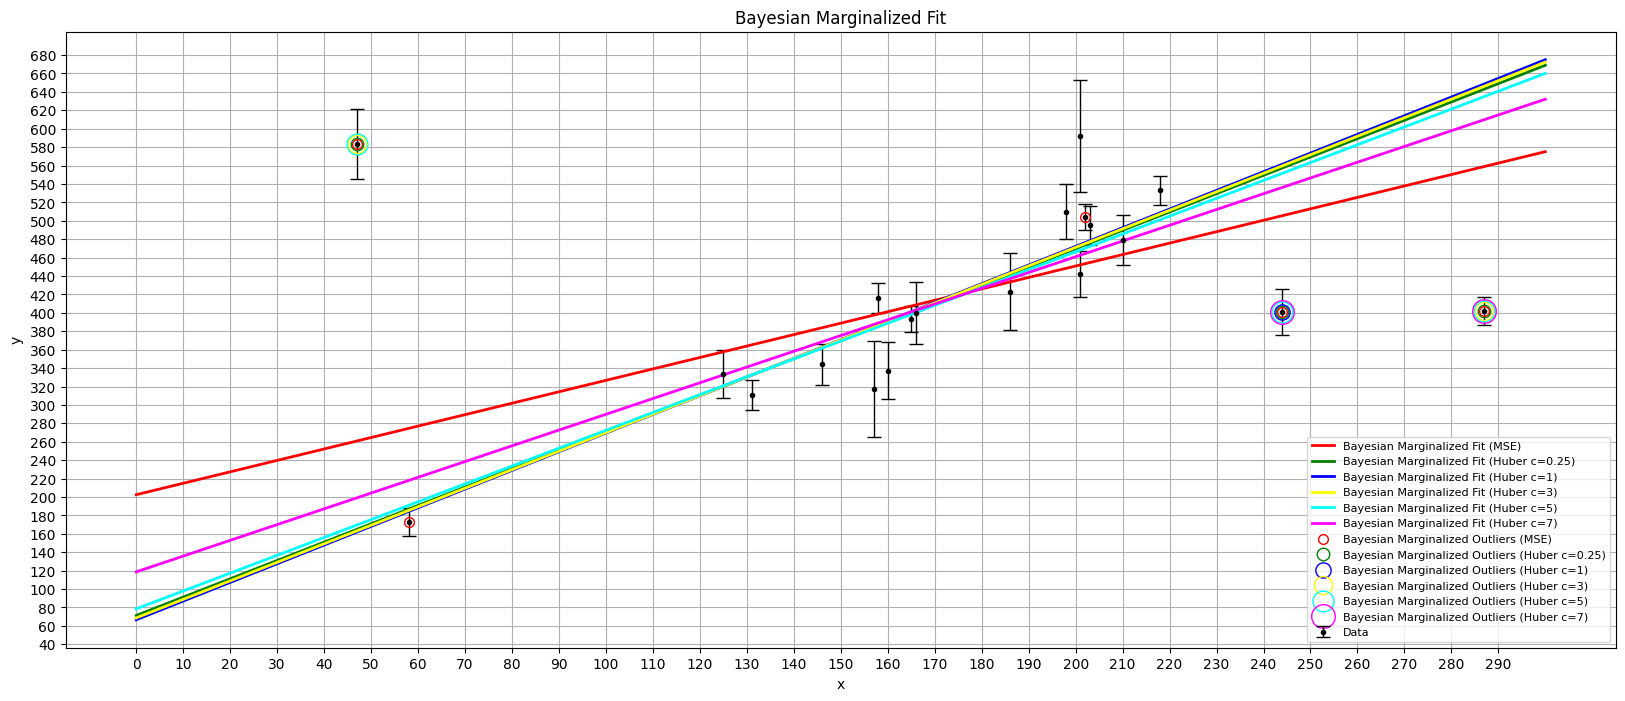

In [6]:
from scipy import optimize

# Read the data from the csv file
df = pd.read_csv('q2.csv', sep=' ')
df.drop('ID', axis=1, inplace=True)
df.drop('sigma_x', axis=1, inplace=True)
# df.drop('sigma_y', axis=1, inplace=True)
df.drop('rho', axis=1, inplace=True)
print(df.head())
x = df['x'].values
y = df['y'].values
sigma_y = df['sigma_y'].values

c_huber = 0.25
c_huber2 = 1
c_huber3 = 3
c_huber4 = 5
c_huber5 = 7

def mse_loss(theta, x=x, y=y, sigma_y=sigma_y):
    dy = y - (theta[0] + theta[1] * x)
    return np.sum(0.5 * (dy / sigma_y) ** 2)

def huber_loss(t, c=2):
    return ((abs(t) < c) * 0.5 * t ** 2 + (abs(t) >= c) * -c * (0.5 * c - abs(t)))

def total_huber_loss(theta, x=x, y=y, sigma_y=sigma_y, c=c_huber):
    return huber_loss((y - theta[0] - theta[1] * x) / sigma_y, c).sum()

total_huber_loss_lambda = lambda c: lambda theta: total_huber_loss(theta, c=c)

# Find the best-fit parameters using the least-squares method
theta1 = optimize.fmin(mse_loss, [0, 0], disp=False)

# Find the best-fit parameters using the Huber loss function
theta2 = optimize.fmin(total_huber_loss, [0, 0], disp=False)

theta_3 = optimize.fmin(total_huber_loss_lambda(0.5), [0, 0], disp=False)
theta_4 = optimize.fmin(total_huber_loss_lambda(1), [0, 0], disp=False)
theta_5 = optimize.fmin(total_huber_loss_lambda(2), [0, 0], disp=False)
theta_6 = optimize.fmin(total_huber_loss_lambda(4), [0, 0], disp=False)

# Print the results of the fits
print(f'MSE fit: m = {theta1[1]:.3f}, b = {theta1[0]:.3f}')
print(f'Huber fit: m = {theta2[1]:.3f}, b = {theta2[0]:.3f}, c = {c_huber:.3f}')
print(f'Huber fit: m = {theta_3[1]:.3f}, b = {theta_3[0]:.3f}, c = {c_huber2:.3f}')
print(f'Huber fit: m = {theta_4[1]:.3f}, b = {theta_4[0]:.3f}, c = {c_huber3:.3f}')
print(f'Huber fit: m = {theta_5[1]:.3f}, b = {theta_5[0]:.3f}, c = {c_huber4:.3f}')
print(f'Huber fit: m = {theta_6[1]:.3f}, b = {theta_6[0]:.3f}, c = {c_huber5:.3f}')

xfit = np.linspace(0, np.round(x.max(), -2), 1000)
plt.figure(figsize=(20, 8))
plt.errorbar(x, y, yerr=sigma_y, fmt='.k', capsize=5, lw=1, label='Data')
plt.plot(xfit, theta1[1] * xfit + theta1[0], '-', label='MSE fit', color='black')
plt.plot(xfit, theta2[1] * xfit + theta2[0], '-', label='Huber fit c={}'.format(c_huber), color='red')
plt.plot(xfit, theta_3[1] * xfit + theta_3[0], '-', label='Huber fit c={}'.format(c_huber2), color='green')
plt.plot(xfit, theta_4[1] * xfit + theta_4[0], '-', label='Huber fit c={}'.format(c_huber3), color='orange')
plt.plot(xfit, theta_5[1] * xfit + theta_5[0], '-', label='Huber fit c={}'.format(c_huber4), color='blue')
plt.plot(xfit, theta_6[1] * xfit + theta_6[0], '-', label='Huber fit c={}'.format(c_huber5), color='purple')
plt.title('Maximum likelihood fit')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(0, 310, 10))
plt.yticks(np.arange(0, 700, 20))
plt.legend()
plt.grid()
plt.show()

# Bayesian Marginalization
def log_prior(theta):
    # m, b = theta
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0.0
    else:
        return -np.inf
    
def log_likelihood(theta, x, y, sigma_y, sigmaB):
    dy = y - (theta[0] + theta[1] * x)
    clipped_dat = np.clip(theta[2:], 0, 1)
    log_l1 = np.log(clipped_dat) - 0.5 * np.log(2 * np.pi * sigma_y ** 2) - 0.5 * (dy / sigma_y) ** 2
    log_l2 = np.log(1 - clipped_dat) - 0.5 * np.log(2 * np.pi * sigmaB ** 2) - 0.5 * (dy / sigmaB) ** 2
    return np.sum(np.logaddexp(log_l1, log_l2))

def log_probability(theta, x, y, sigma_y, sigmaB):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, sigma_y, sigmaB)

ndim = 2 + len(x) 
nwalkers = 50 
nburn = 1000
nsteps = 15000 

pos1 = np.zeros((nwalkers, ndim))
pos1[:, :2] = np.random.normal(theta1, 3, size=(nwalkers, 2))
pos1[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))
sampler1 = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, sigma_y, 100))
sampler1.run_mcmc(pos1, nsteps, progress=True)
samples1 = sampler1.get_chain(discard=nburn, flat=True, thin=15)

pos2 = np.zeros((nwalkers, ndim))
pos2[:, :2] = np.random.normal(theta2, 3, size=(nwalkers, 2))
pos2[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))
sampler2 = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, sigma_y, 100))
sampler2.run_mcmc(pos2, nsteps, progress=True)
samples2 = sampler2.get_chain(discard=nburn, flat=True, thin=15)

pos3 = np.zeros((nwalkers, ndim))
pos3[:, :2] = np.random.normal(theta_3, 3, size=(nwalkers, 2))
pos3[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))
sampler3 = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, sigma_y, 100))
sampler3.run_mcmc(pos3, nsteps, progress=True)
samples3 = sampler3.get_chain(discard=nburn, flat=True, thin=15)

pos4 = np.zeros((nwalkers, ndim))
pos4[:, :2] = np.random.normal(theta_4, 3, size=(nwalkers, 2))
pos4[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))
sampler4 = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, sigma_y, 100))
sampler4.run_mcmc(pos4, nsteps, progress=True)
samples4 = sampler4.get_chain(discard=nburn, flat=True, thin=15)

pos5 = np.zeros((nwalkers, ndim))
pos5[:, :2] = np.random.normal(theta_5, 3, size=(nwalkers, 2))
pos5[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))
sampler5 = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, sigma_y, 100))
sampler5.run_mcmc(pos5, nsteps, progress=True)
samples5 = sampler5.get_chain(discard=nburn, flat=True, thin=15)

pos6 = np.zeros((nwalkers, ndim))
pos6[:, :2] = np.random.normal(theta_6, 3, size=(nwalkers, 2))
pos6[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))
sampler6 = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, sigma_y, 100))
sampler6.run_mcmc(pos6, nsteps, progress=True)
samples6 = sampler6.get_chain(discard=nburn, flat=True, thin=15)


theta_samples1 = np.mean(samples1[:, :2], axis=0)
tmp1 = np.mean(samples1[:, 2:], axis=0)
outliers1 = (tmp1 < 0.42)

theta_samples2 = np.mean(samples2[:, :2], axis=0)
tmp2 = np.mean(samples2[:, 2:], axis=0)
outliers2 = (tmp2 < 0.427)

theta_samples3 = np.mean(samples3[:, :2], axis=0)
tmp3 = np.mean(samples3[:, 2:], axis=0)
outliers3 = (tmp3 < 0.4)

theta_samples4 = np.mean(samples4[:, :2], axis=0)
tmp4 = np.mean(samples4[:, 2:], axis=0)
outliers4 = (tmp4 < 0.423)

theta_samples5 = np.mean(samples5[:, :2], axis=0)
tmp5 = np.mean(samples5[:, 2:], axis=0)
outliers5 = (tmp5 < 0.41)

theta_samples6 = np.mean(samples6[:, :2], axis=0)
tmp6 = np.mean(samples6[:, 2:], axis=0)
outliers6 = (tmp6 < 0.4)


# sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
# samples = sampler.chain[:, nburn:, :].reshape(-1, ndim)
# plt.plot(samples[:, 0], samples[:, 1], 'k.', alpha=0.1)
# plt.xlabel('m')
# plt.ylabel('b')
# plt.show()
# plt.figure(figsize=(15, 5))
# plt.plot(samples[:, 0], samples[:, 1], 'k.', alpha=0.1)
# plt.xlabel('m')
# plt.ylabel('b')
# plt.show()

plt.figure(figsize=(20, 8))
xfit = np.linspace(0, np.round(x.max(), -2), 1000)
plt.title('Bayesian Marginalized Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.yticks(np.arange(0, 700, 20))
plt.xticks(np.arange(0, 300, 10))
plt.errorbar(x, y, yerr=sigma_y, fmt='.k', capsize=5, lw=1, label='Data')
plt.plot(xfit, theta_samples1[1] *xfit + theta_samples1[0], ls='-', lw=2, color='red', label='Bayesian Marginalized Fit (MSE)')
plt.plot(xfit, theta_samples2[1] *xfit + theta_samples2[0], ls='-', lw=2, color='green', label='Bayesian Marginalized Fit (Huber c={})'.format(c_huber))
plt.plot(xfit, theta_samples3[1] *xfit + theta_samples3[0], ls='-', lw=2, color='blue', label='Bayesian Marginalized Fit (Huber c={})'.format(c_huber2))
plt.plot(xfit, theta_samples4[1] *xfit + theta_samples4[0], ls='-', lw=2, color='yellow', label='Bayesian Marginalized Fit (Huber c={})'.format(c_huber3))
plt.plot(xfit, theta_samples5[1] *xfit + theta_samples5[0], ls='-', lw=2, color='cyan', label='Bayesian Marginalized Fit (Huber c={})'.format(c_huber4))
plt.plot(xfit, theta_samples6[1] *xfit + theta_samples6[0], ls='-', lw=2, color='magenta', label='Bayesian Marginalized Fit (Huber c={})'.format(c_huber5))
plt.plot(x[outliers1], y[outliers1], 'ro', ms=7, mfc='none', mec='red', label='Bayesian Marginalized Outliers (MSE)')
plt.plot(x[outliers2], y[outliers2], 'go', ms=9, mfc='none', mec='green', label='Bayesian Marginalized Outliers (Huber c={})'.format(c_huber))
plt.plot(x[outliers3], y[outliers3], 'bo', ms=11, mfc='none', mec='blue', label='Bayesian Marginalized Outliers (Huber c={})'.format(c_huber2))
plt.plot(x[outliers4], y[outliers4], 'yo', ms=13, mfc='none', mec='yellow', label='Bayesian Marginalized Outliers (Huber c={})'.format(c_huber3))
plt.plot(x[outliers5], y[outliers5], 'co', ms=15, mfc='none', mec='cyan', label='Bayesian Marginalized Outliers (Huber c={})'.format(c_huber4))
plt.plot(x[outliers6], y[outliers6], 'mo', ms=17, mfc='none', mec='magenta', label='Bayesian Marginalized Outliers (Huber c={})'.format(c_huber5))
plt.legend(loc='best', fontsize=8)
plt.grid()
plt.show()


As we can see from the above plots, the outliers detected by our six initializations of Bayesian Marginalization, i.e., Bayesian Fit with MSE fit, and Bayesian Fit with Huber fit for $c=0.25,1,3,5,7$, are **almost same**. 

The common points detected as outliers are the points with the following coordinates:
- (244, 401)
- (287, 402)
- (47, 583)